Aufgabe 1
=========


Implementieren Sie die iterierte Mittelpunktsregel, um das Integral einer Funktion f : [a, b] × [c, d] → R zu approximieren. Berechnen Sie damit folgendes Doppelintegral 

\begin{align*}
    \int _0^1 \left(\int_0^\pi x^3cos(x^2y)dy\right)dx
\end{align*}

Hinweis: Fassen Sie das innere Integral als Funktion der äußeren Integrationsvariable auf
\begin{align*}
    g(x) = \int _c^d f(x,y)dy
\end{align*}
und verwenden Sie das Konzept der lambda Funktion.

Es gilt die Approximation:

\begin{align*}
    \iint_B f(x,y)d(x,y)\approx \sum_{j=0}^{N-1} h_j \sum_{i=1}^s b_i \sum_{\mu = 0}^{M(i,j)-1} k_\mu \sum_{\nu = 1}^{\~s} \~b_\nu f(x_j +c_ih_j,y_\mu+\~c_\nu k_\mu)
\end{align*}

Für die Mittelpunktsregel gilt hierbei $s= \~s = 1$ und $b=\~b=1$ sowie $c = \~c = 0.5$ also

\begin{align*}
    \iint_B f(x,y)d(x,y)\approx \sum_{j=0}^{N-1} h_j \sum_{\mu = 0}^{M(j)-1} k_\mu f(x_j +0.5 h_j,y_\mu+0.5 k_\mu)
\end{align*}

In [7]:
import numpy as np 

def quad_it_mid(f, a, b, c, d, N, M):
    
    # Schrittweite
    h = (b-a)/N     
    k = (d-c)/M
    
    # Summe einführen
    sum = 0
    for j in range(N):
        # x_j bestimmen
        x_j = a + (j + 0.5)*h
        
        # Summe für die innere Funktion einführen
        g_x = 0
        # für jedes x_j über y_mu iterieren
        for mu in range(M):
            # y_mu bestimmen
            y_mu = c + (mu + 0.5) * k

            # g_x Werte mit k multiplizieren und summieren
            g_x += f(x_j,y_mu) * k 
        #Gesamtsumme ausrechnen
        sum += g_x * h
    return sum

f = lambda x, y: (x**3)*np.cos((x**2)*y)

quad_it_mid(f, 0, 1, 0, np.pi, 100, 100)

0.31833996220988586

Aufgabe 2
===========

 Versuchen Sie folgende Eingaben in Python und erklären Sie die Ergebnisse:  
<!--
(a) 
>(1.0+0.001)-1.0 == 0.001

(b)
> sum = 0  
> for i in range(1000):  
>   sum += 1.0/1000  
>  sum == 1.0  

(c) 
>1e-20 + 1.0 == 1.0

(d) 
>a = 0.75 + 1e-16  
>b = 0.75  
>c = 0.50  
>d = 0.50 - 1e-16  

>print(a>b)  
>print(c>d)  
>print(a+c>b+d)  --> 


In [8]:
# (a) 
print((1.0+0.001)-1.0 == 0.001)

print((1.0+0.001)-1.0)

# Aufgrund der Verwendung der Gleitkommazahlen und der relativen Maschinengenauigkeit wird die Float als 0.0009... gespeichert und ist somit nicht mehr 
# dasselbe wie 0.001

False
0.0009999999999998899


In [9]:
# (b)
sum = 0  
for i in range(1000):  
    sum += 1.0/1000  
print(sum == 1.0)  

# der Rundungsfehler der durch die Floats und somit kleinen schritte entsteht wird aufsummiert und liefert somit wieder nicht das richtige ergebnis

False


In [10]:
# (c)

print(1e-20 + 1.0 == 1.0)
print(1e-20 + 1.0)

# 1e-20 ist bereits weit unterhalb der maschinengenauigkeit und deshalb nicht mehr darstellbar  und somit irrelevant


True
1.0


In [11]:
# (d)

a = 0.75 + 1e-16
b = 0.75
c = 0.50
d = 0.50 - 1e-16
print(a>b)
print(c>d)
print(a+c>b+d)


a = 0.75 + 1e-17
b = 0.75
c = 0.50
d = 0.50 - 1e-17
print(a>b)
print(c>d)
print(a+c>b+d)

# e-16 ist gerade noch im bereich der maschinengenauigkeit weshalb sie noch als größer oder kleiner interpretiert werden können. 
# 1e-17 ist dies bereits nicht mehr der Fall und geht quasi unter

True
True
False
False
False
False


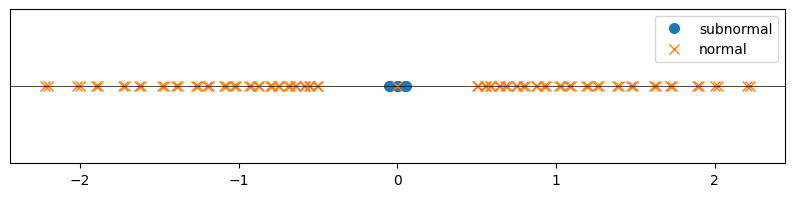

In [ ]:

import numpy as np 
import matplotlib.pyplot as plt 

x_normal = []
x_normal.append(0)

x_subnormal = []

for Vorzeichen in [-1,1]:
    for i in np.linspace(-1, 1, 10): #[-1, 0, 1]:  # 
        for j in [1.00, 1.01, 1.10, 1.11]:
            x_j = Vorzeichen * j * 2**(i)
            x_normal.append(x_j)

for Vorzeichen in [-1,1]:
    for k in [0.01, 0.10, 0.11]:
        x_k = Vorzeichen*k*2**(-1)
        x_subnormal.append(x_k)


plt.figure(figsize=(10, 2))
plt.plot(x_subnormal, np.zeros_like(x_subnormal), 'o', markersize=7, label = 'subnormal')  
plt.plot(x_normal, np.zeros_like(x_normal), 'x', markersize=7, label = 'normal')
plt.legend()
plt.axhline(0, color='black', linewidth=0.5) 
plt.yticks([])  


plt.show()